### 🎯 Ziel:
Aus Hotelbewertungen (Text) automatisch erkennen, ob sie positiv oder negativ sind.
➡️ Binary Sentiment Classification

Aufgaben:
Rating → Sentiment umwandeln:

1 oder 2 → negativ (Label 0)

4 oder 5 → positiv (Label 1)

3 → ignorieren (neutral, schwer einzuordnen)

Daten aufräumen (z. B. leere Einträge raus)

Optional: Text vorverarbeiten (klein schreiben, Sonderzeichen, Stoppwörter)

## Schritt 2: Modell erstellen & trainieren

Logistische Regression

TF-IDF Vektorisierung der Texte

Training / Testdaten aufteilen

Modell trainieren

Vorhersagen testen

## Schritt 3: Evaluation
Accuracy, Precision, Recall, F1

Confusion Matrix



In [20]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import neattext.functions as nfx
import re


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("tripadvisor_hotel_reviews.csv")

In [3]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


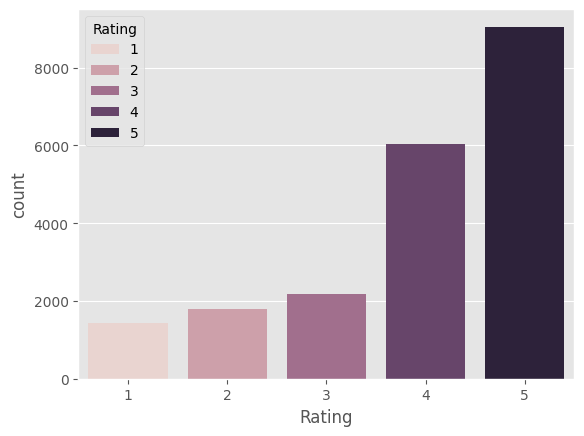

In [18]:
# how much percentage rating in the dataset
sns.countplot(x=df['Rating'],hue=df['Rating']);

In [6]:
# Neue Spalte "Sentiment" erstellen:
# 1-2 = negativ (0), 4-5 = positiv (1), 3 = neutral (NaN)
df['Sentiment'] = df['Rating'].apply(lambda x: 1 if x >= 4 else (0 if x <= 2 else np.nan))

In [7]:
df.head()

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,1.0
1,ok nothing special charge diamond member hilto...,2,0.0
2,nice rooms not 4* experience hotel monaco seat...,3,NaN
3,"unique, great stay, wonderful time hotel monac...",5,1.0
4,"great stay great stay, went seahawk game aweso...",5,1.0


In [8]:
# Klassenverteilung anzeigen
sentiment_counts = df['Sentiment'].value_counts(dropna=False).rename_axis("Sentiment").reset_index(name="Anzahl")
print("📊 Klassenverteilung:\n")
print(sentiment_counts)

📊 Klassenverteilung:

   Sentiment  Anzahl
0        1.0   15093
1        0.0    3214
2        NaN    2184


In [9]:
df_model = df[df['Sentiment'].isin([0, 1])].copy()

In [10]:

df_model['Review'] = df_model['Review'].apply(nfx.normalize)

In [14]:
df_model.sample()

,Review,Rating,Sentiment
8340,not stay husband stayed hotels barcelona extr...,1,0.0
3061,got royal service loved minute fiance just got...,5,1.0
15065,avoid hotel bound spend nights weeks honeymo...,1,0.0
17684,fabulous hotel mum just returned night stay h...,5,1.0
6631,march wonderful relaxing vacation having st...,4,1.0
5706,refurbishment stayed day break april room en...,4,1.0
1039,great place stay sf regular hotel san francisc...,5,1.0
3576,sailed everyday wife seniors went weeks march ...,4,1.0
7759,great hotel recently stayed hotel nights busi...,5,1.0
12038,high standard great location best rates highly...,4,1.0


In [15]:
# Alles klein, Sonderzeichen entfernen (kann nfx auch teilweise)
df_model['Review'] = df_model['Review'].str.lower().str.replace(r'[^a-z\s]', '', regex=True)


In [16]:
df_model.head()

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,1.0
1,ok nothing special charge diamond member hilto...,2,0.0
3,unique great stay wonderful time hotel monaco ...,5,1.0
4,great stay great stay went seahawk game awesom...,5,1.0
5,love monaco staff husband stayed hotel crazy w...,5,1.0
6,cozy stay rainy city husband spent nights mon...,5,1.0
7,excellent staff housekeeping quality hotel cho...,4,1.0
8,hotel stayed hotel monaco cruise rooms generou...,5,1.0
9,excellent stayed hotel monaco past we delight ...,5,1.0
10,poor value stayed monaco seattle july nice hot...,2,0.0


###🖼️ Ergebnis:
Links: was Nutzer mögen (z. B. "friendly", "clean", "location")

Rechts: was Nutzer stört (z. B. "dirty", "rude", "noise")

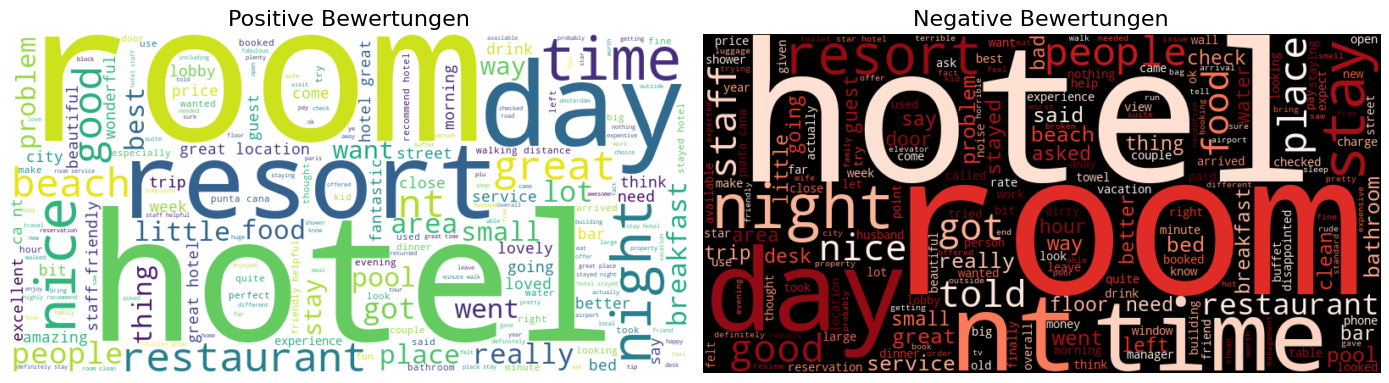

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Text nach Sentiment gruppieren
text_pos = ' '.join(df_model[df_model['Sentiment'] == 1]['Review'])
text_neg = ' '.join(df_model[df_model['Sentiment'] == 0]['Review'])

# 2. WordCloud für positive Reviews
wc_pos = WordCloud(width=800, height=400, background_color='white').generate(text_pos)

# 3. WordCloud für negative Reviews
wc_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(text_neg)

# 4. Anzeigen
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(wc_pos, interpolation='bilinear')
plt.title("Positive Bewertungen", fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wc_neg, interpolation='bilinear')
plt.title("Negative Bewertungen", fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
### Wir sagen der WordCloud einfach:

„Ignoriere Wörter wie hotel, room, stay, rooms usw.“

Dann erscheinen wichtigere Begriffe wie:

"friendly", "clean", "helpful", "noisy", "rude", "dirty" usw.

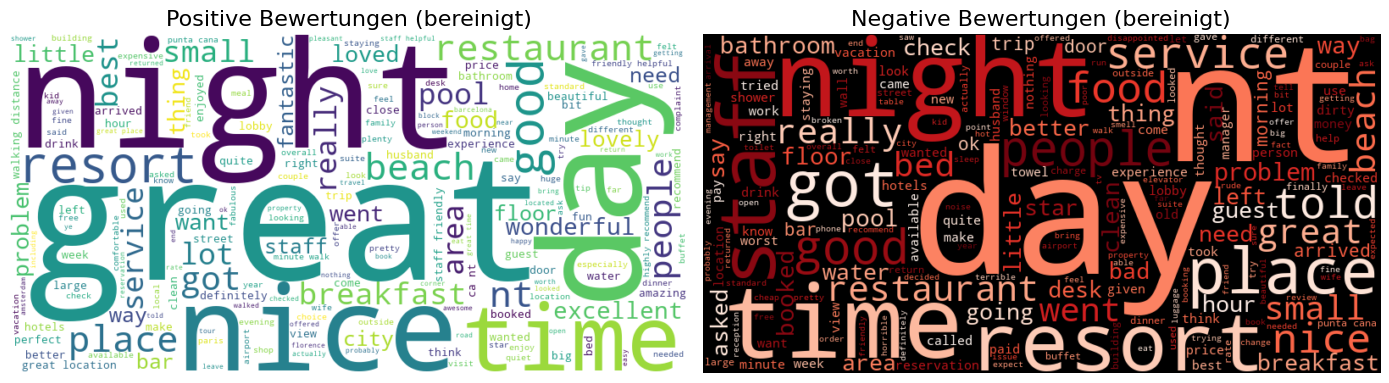

In [19]:
# Zusätzliche irrelevante Wörter definieren
custom_stopwords = set(WordCloud().stopwords)
custom_stopwords.update(["hotel", "room", "rooms", "stay", "stayed", "one", "us"])

# WordCloud neu generieren mit erweiterten Stopwords
wc_pos = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text_pos)
wc_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds', stopwords=custom_stopwords).generate(text_neg)

# Anzeigen wie vorher
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(wc_pos, interpolation='bilinear')
plt.title("Positive Bewertungen (bereinigt)", fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wc_neg, interpolation='bilinear')
plt.title("Negative Bewertungen (bereinigt)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


In [22]:


# 1. TF-IDF-Vektorisierung
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_model['Review'])
y = df_model['Sentiment']

# 2. Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Modell trainieren
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Vorhersage
y_pred = model.predict(X_test)


In [23]:
# 5. Evaluation
print("\n📊 Klassifikationsbericht:")
print(classification_report(y_test, y_pred))


📊 Klassifikationsbericht:
              precision    recall  f1-score   support

         0.0       0.96      0.78      0.86       658
         1.0       0.95      0.99      0.97      3004

    accuracy                           0.95      3662
   macro avg       0.95      0.89      0.92      3662
weighted avg       0.95      0.95      0.95      3662



C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129518 (\N{ABACUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


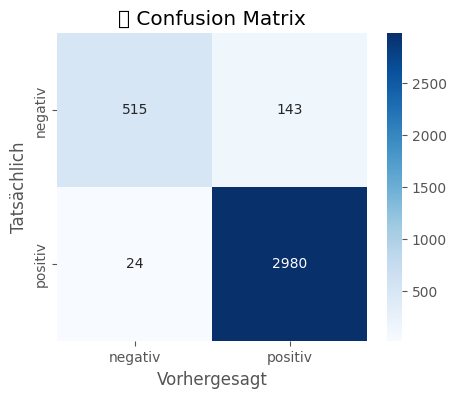

In [24]:
# 6. Confusion Matrix anzeigen
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["negativ", "positiv"], yticklabels=["negativ", "positiv"])
plt.xlabel("Vorhergesagt")
plt.ylabel("Tatsächlich")
plt.title("🧮 Confusion Matrix")
plt.show()

In [25]:
import pickle

# Modell speichern
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# TF-IDF-Vektorizer speichern
with open("tfidf.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("✅ model.pkl und tfidf.pkl wurden erfolgreich gespeichert.")


✅ model.pkl und tfidf.pkl wurden erfolgreich gespeichert.


# (1) Reset-Index, wenn du iloc nutzt
df_temp = df_model.reset_index(drop=True)

# (2) Prediction
y_pred = model.predict(X_test)

# (3) DataFrame bauen
df_submission = pd.DataFrame({
    "Review": df_temp.iloc[y_test.index]["Review"].values,
    "Actual": y_test.values,
    "Predicted": y_pred
})

# (4) Speichern
df_submission.to_csv("submission_demo.csv", index=False)
